In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
plt.style.context('fivethirtyeight')
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jayachandru001/Heart-Failure-Prediction-/main/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

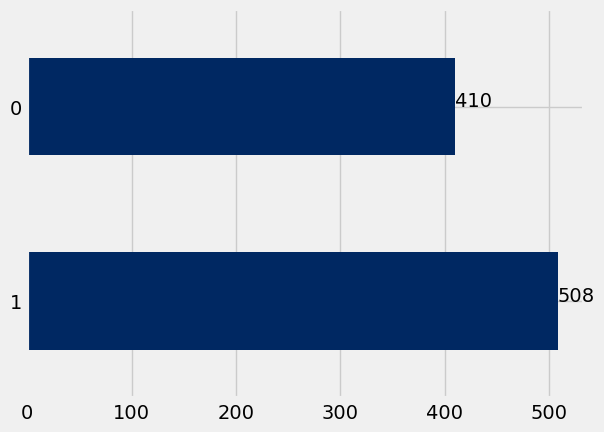

In [30]:
df['HeartDisease'].value_counts().plot(kind = 'barh',color= '#002862')
for index, value in enumerate(df['HeartDisease'].value_counts()):
    plt.text(value, index,
             str(value))
plt.show()

<AxesSubplot:>

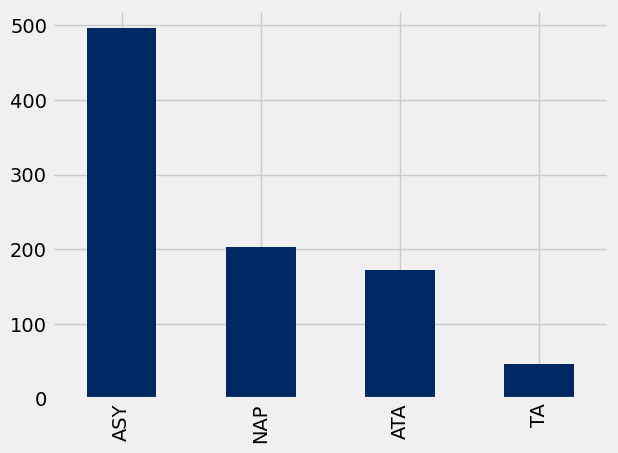

In [31]:
df['ChestPainType'].value_counts().plot(kind = 'bar', color= '#002862')

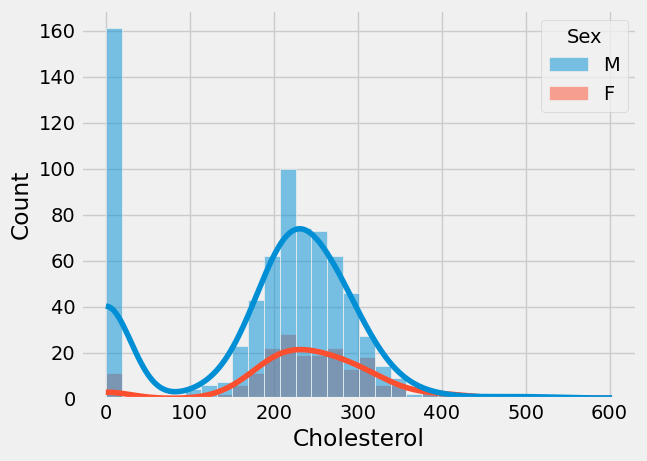

In [33]:
sns.histplot(x='Cholesterol', data=df, kde=True, hue='Sex')
plt.show()

In [32]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

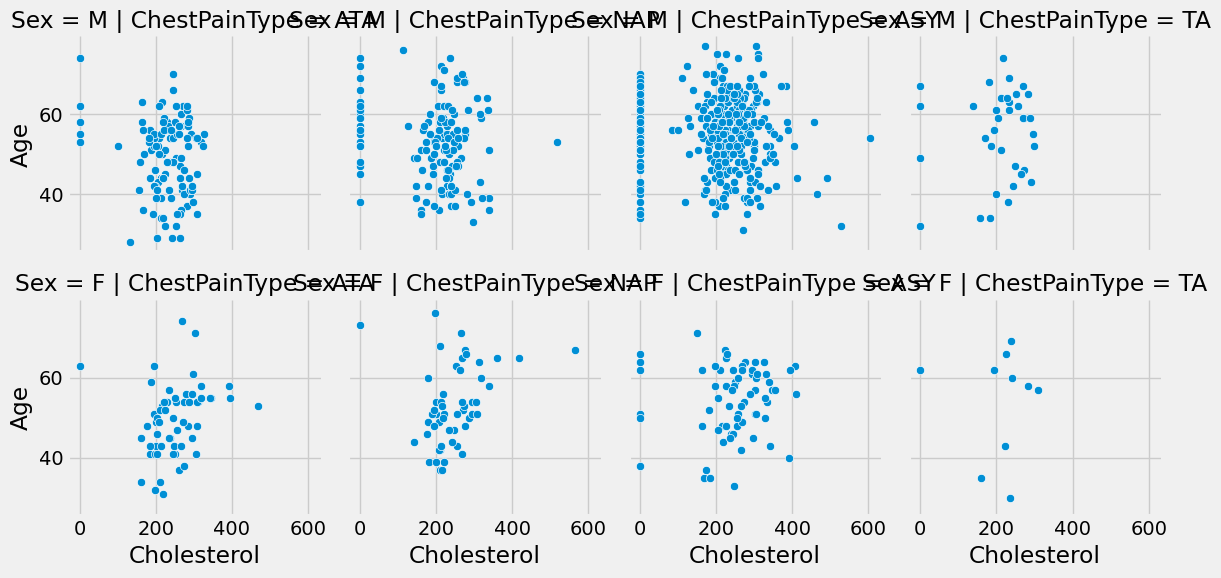

In [41]:
g = sns.FacetGrid(data=df ,row="Sex",  col="ChestPainType" )
g.map(sns.scatterplot, "Cholesterol", "Age")

In [55]:
#Creating dummy variable for categorical variables
df2 = pd.get_dummies(df, drop_first=True)

In [56]:
#X and Y defining
X = df2.iloc[:,:-1]
y = df2.iloc[::,-1]

In [46]:
#Train test split
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state= 25)

In [58]:
x_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat
205,50,150,215,0,140,0.0,0,1,0,0,0,1,0,1,0
358,38,115,0,0,128,0.0,1,1,0,1,0,1,0,1,1
30,53,145,518,0,130,0.0,1,1,0,1,0,1,0,0,1
609,46,134,310,0,126,0.0,1,1,0,0,0,1,0,0,1
299,47,110,0,1,149,2.1,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,56,140,0,1,121,1.8,1,1,0,0,0,1,0,1,0
143,53,140,243,0,155,0.0,0,1,0,0,0,1,0,0,0
474,62,131,0,0,130,0.1,0,1,1,0,0,1,0,0,0
318,61,130,0,1,77,2.5,1,1,0,0,0,1,0,0,1


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier()

In [59]:
rf_model = rf.fit(x_train, y_train)

In [60]:
rf_model.score(x_test,y_test)

0.9478260869565217

In [61]:
### Let's see Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gbc = GradientBoostingClassifier()

In [71]:
gbc_model = gbc.fit(x_train, y_train)

In [72]:
gbc_model.score(x_test,y_test)

0.9608695652173913

In [73]:
#Using Decesion Tree
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt = DecisionTreeClassifier(max_depth= 15, min_samples_leaf=6)

In [75]:
dt_model = dt.fit(x_train, y_train)

In [76]:
dt_model.score(x_test,y_test)

0.9608695652173913

In [77]:
## Random Forest with Grid Search CV

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [80]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [81]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [82]:
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [83]:
rf_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_samples': 0.5,
 'max_features': 1.0,
 'max_depth': None,
 'bootstrap': True}

In [84]:
rv_cv = RandomForestClassifier(n_estimators= 100, min_samples_split= 5, min_samples_leaf= 1,max_samples= 0.5,max_features= 1.0,max_depth= None,bootstrap= True)

In [85]:
rf_cv_model = rv_cv.fit(x_train, y_train)

In [86]:
rf_cv_model.score(x_test,y_test)

0.9434782608695652